In [1]:
import sklearn
sklearn.__version__

'1.1.2'

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [10]:
x,y = load_breast_cancer(return_X_y=True,as_frame=True)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
y.unique()

array([0, 1])

In [32]:
x_train,  x_test, y_train, y_test = train_test_split(x,y ,random_state=42)

In [33]:
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.9300699300699301

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


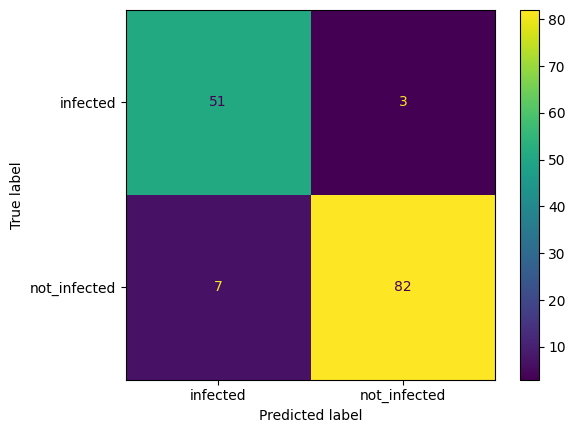

In [35]:
plot_confusion_matrix(model, x_test, y_test, display_labels=['infected','not_infected'])

[Text(0.625, 0.9375, 'X[7] <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]'),
 Text(0.4318181818181818, 0.8125, 'X[20] <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]'),
 Text(0.3181818181818182, 0.6875, 'X[10] <= 0.626\ngini = 0.039\nsamples = 249\nvalue = [5, 244]'),
 Text(0.22727272727272727, 0.5625, 'X[24] <= 0.178\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.18181818181818182, 0.4375, 'X[14] <= 0.003\ngini = 0.016\nsamples = 245\nvalue = [2, 243]'),
 Text(0.09090909090909091, 0.3125, 'X[22] <= 99.845\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.045454545454545456, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.13636363636363635, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.3125, 'X[21] <= 33.35\ngini = 0.008\nsamples = 239\nvalue = [1, 238]'),
 Text(0.22727272727272727, 0.1875, 'gini = 0.0\nsamples = 225\nvalue = [0, 225]'),
 Text(0.3181818181818182, 0.1875, 'X[21] <= 33.56\ngini = 0.133\nsamp

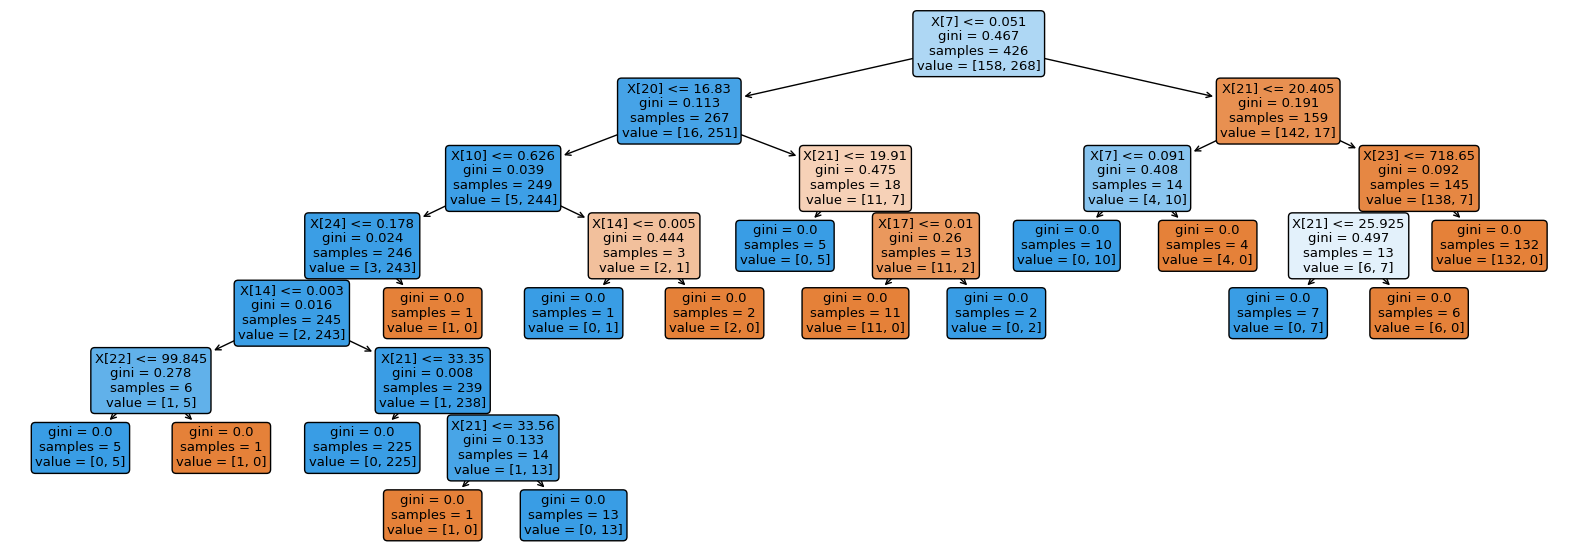

In [36]:
plt.figure(figsize=(20,7))
plot_tree(model, filled=True, rounded=True)

In [37]:
path = model.cost_complexity_pruning_path(x_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00232826, 0.00312989, 0.00459972, 0.00596017,
        0.00794511, 0.01213836, 0.01341382, 0.01516793, 0.01610939,
        0.02658769, 0.02752968, 0.32476748]),
 'impurities': array([0.        , 0.00931302, 0.01244291, 0.01704264, 0.02300281,
        0.03094792, 0.04308627, 0.05650009, 0.07166802, 0.08777741,
        0.1143651 , 0.14189478, 0.46666226])}

In [38]:
ccp_alphas = path['ccp_alphas']
models = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(x_train,y_train)
    models.append(model)
    print(f"when alpha = {alpha}, no. of nodes = {model.tree_.node_count}")


when alpha = 0.0, no. of nodes = 31
when alpha = 0.002328255245760283, no. of nodes = 23
when alpha = 0.0031298904538341154, no. of nodes = 21
when alpha = 0.004599723778209322, no. of nodes = 19
when alpha = 0.005960174144419194, no. of nodes = 17
when alpha = 0.007945106536655833, no. of nodes = 15
when alpha = 0.012138357208779744, no. of nodes = 13
when alpha = 0.01341381623071764, no. of nodes = 11
when alpha = 0.015167930660888408, no. of nodes = 9
when alpha = 0.016109388426047005, no. of nodes = 7
when alpha = 0.026587690678154058, no. of nodes = 5
when alpha = 0.0275296823029135, no. of nodes = 3
when alpha = 0.3247674769665928, no. of nodes = 1


In [39]:
#We ignore last alpha value as it has only one node

train_scores = [model.score(x_train,y_train) for model in models[:-1]]
test_scores = [model.score(x_test,y_test) for model in models[:-1]]

<Figure size 1500x700 with 0 Axes>

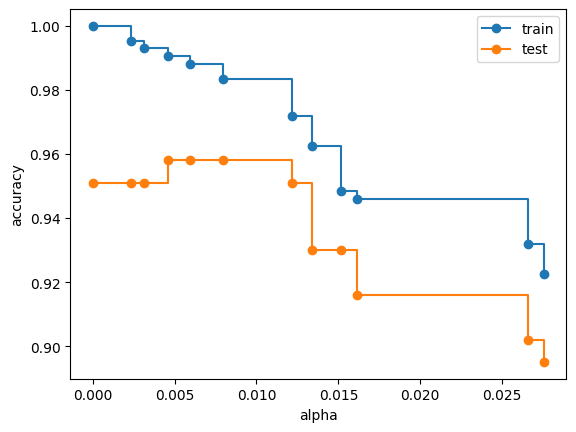

In [40]:
plt.figure(figsize=(15,7))
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas[:-1],train_scores, '-o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas[:-1],test_scores,'-o',label='test', drawstyle='steps-post')
plt.legend()

In [44]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.007945106536655833)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.958041958041958

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


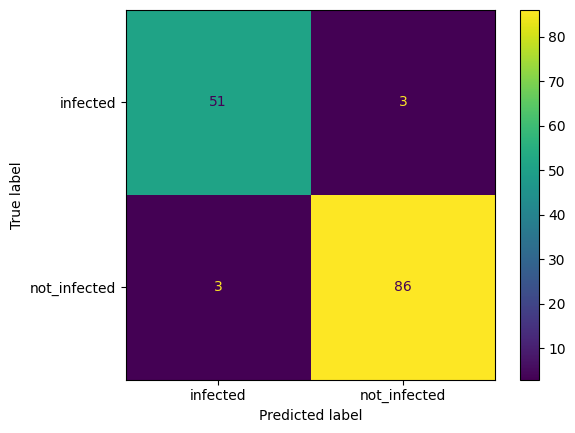

In [45]:
plot_confusion_matrix(model, x_test, y_test, display_labels=['infected','not_infected'])

[Text(0.4230769230769231, 0.9, 'X[7] <= 0.051\ngini = 0.467\nsamples = 426\nvalue = [158, 268]'),
 Text(0.15384615384615385, 0.7, 'X[20] <= 16.83\ngini = 0.113\nsamples = 267\nvalue = [16, 251]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.039\nsamples = 249\nvalue = [5, 244]'),
 Text(0.23076923076923078, 0.5, 'X[1] <= 16.19\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.6923076923076923, 0.7, 'X[21] <= 20.405\ngini = 0.191\nsamples = 159\nvalue = [142, 17]'),
 Text(0.5384615384615384, 0.5, 'X[20] <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.8461538461538461, 0.5, 'X[23] <= 718.65\ngini = 0.092\nsamples = 145\nvalue = [138, 7]'),
 Text(0.7692307692307693, 

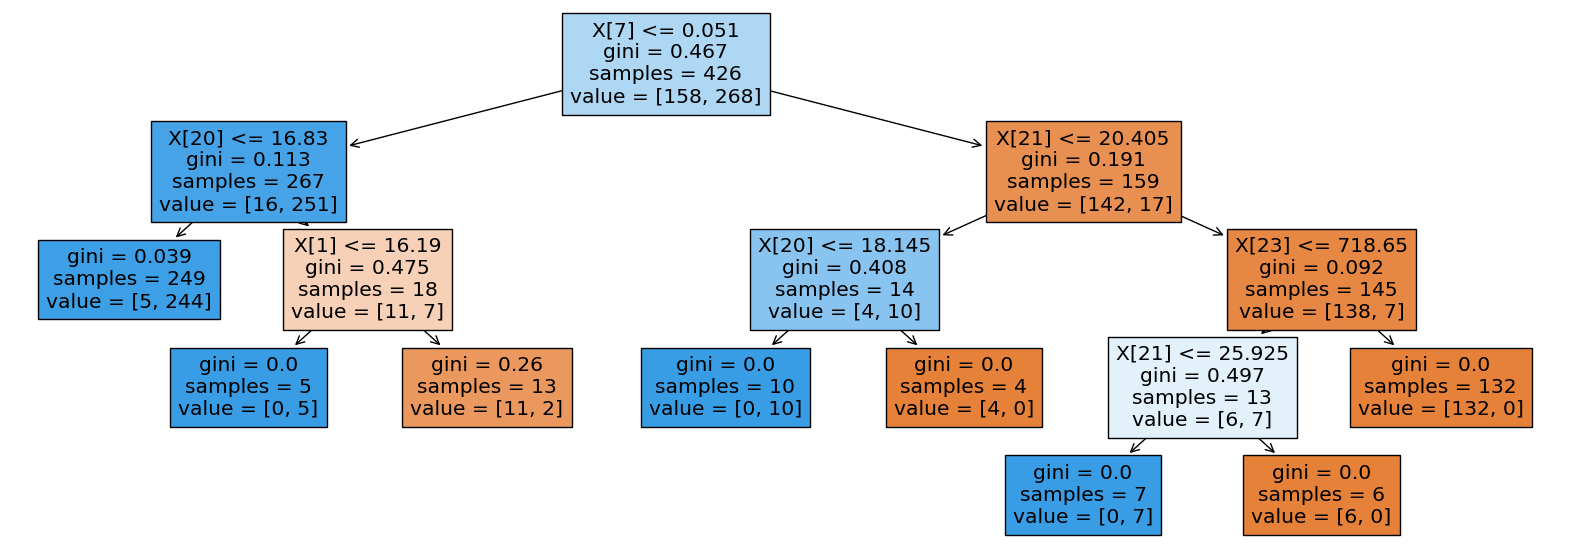

In [48]:
plt.figure(figsize=(20,7))
plot_tree(model, filled=True)